<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
The [Istio Leadership Dataset](https://github.com/geekygirldawn/k8s_data/tree/main/datasets) and the analysis in this notebook were created by [Dawn Foster](https://fastwonderblog.com/) and are licensed under the [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

# Summary of Istio Leadership Positions (2022-04-25)
**Important Caveat**: The affiliation data is only as good as what people put on their GitHub profiles and in the CNCF database (see below).

Overall, just under 50% Istio leaders work at Google. 7% of leaders work at IBM and 7% at Red Hat or 14% if you consider them a single entity, since IBM owns Red Hat, but in my experience they tend to operate relatively independently. IBM employees come in at number 2 for significant leadership positions (SC, TOC, WG Lead) with about 15% of the people in these roles. No other company has employees with more than 5% of leaders.

![Graph of all leaders by company](istio_graphs_2022-04-25/all_leaders.png)

![Graph of top leaders by company](istio_graphs_2022-04-25/top_leaders.png)

This notebook contains data structures that allow you to further explore the data and see exactly how these charts were created and how the data was analyzed.

### Dataset Summary
* The source of this data is the Istio [teams.yaml](https://github.com/istio/community/commits/master/org/teams.yaml) file. 
* The leadership roles were read from the yaml file and stored in the [owners_data_istio_2022-04-25.csv](owners_data_istio_2022-04-25.csv) file. Release teams for specific releases were excluded.
* The GitHub REST API was used as a starting point to populate company information, since that's likely the most up to date source. [CNCF Affiliation](https://github.com/cncf/gitdm) data was used to fill in missing data if available.
* There are 280 leadership roles (with duplicates), 100 users, 23 companies, and 4 people with 'Unknown' affiliations.
* There is quite a bit of duplication when just looking at roles, since there are "Maintainer" roles, "WG Maintainer", and WG subteams, and many people hold multiple positions that likely cover most of the same work.


In [2]:
import pandas as pd

# Read CSV skipping the 5 rows with dataset license info
#istioDF = pd.read_csv('owners_data_istio_2022-04-22.csv', skiprows=5)
istioDF = pd.read_csv('owners_data_istio_2022-04-25.csv', skiprows=5)
# Data Cleanup

# Remove some accounts that aren't people
istioDF.drop(istioDF[istioDF.username.str.startswith('istio')].index, inplace=True)

# Map companies to remove duplicates, and map everything that isn't an org into a single 'Unknown' category
istioDF.company = istioDF.company.replace({r'^.*oogle.*$': 'Google LLC', 
                                  r'^.*IBM.*$': 'IBM',
                                  'International Business Machines Corporation' : 'IBM',
                                  r'^.*solo.*$': 'Solo.io',
                                  'Independent' : 'Unknown',
                                  '@tetrateio' : 'Tetrate.io',
                                  'Istio' : 'Unknown',
                                  r'^.*libaba.*$' : 'Alibaba',
                                  r'Cisco.*$' : 'Cisco Systems',
                                  r'^.*tripe.*$' : 'Stripe',
                                  r'^.*ntel.*$' : 'Intel',
                                  r'^.*Red.*$' : 'Red Hat',
                                  r'^.*Salesf.*$' : 'Salesforce',      
                                  '@Tencent' : 'Tencent',
                                  'NotFound' : 'Unknown'}, regex=True)

istioDF

,company,username,team
0,Google LLC,adammil2000,Maintainers
1,Google LLC,andraxylia,Maintainers
2,Clickhouse,bianpengyuan,Maintainers
3,Red Hat,brian-avery,Maintainers
4,Red Hat,clyang82,Maintainers
...,...,...,...
278,Tetrate.io,liamawhite,WG - User Experience Maintainers
279,Google LLC,nmittler,WG - User Experience Maintainers
280,VMware,shamsher31,WG - User Experience Maintainers
281,Google LLC,therealmitchconnors,WG - User Experience Maintainers


## Data by GitHub username

In [3]:
import numpy as np
from collections import Counter

# Get an array of unique GitHub usernames
users = istioDF['username'].unique()
print('These', len(users), 'users hold one or more leadership positions:')
print(users)

# Use a dictionary to map company affiliation to each unique username
user_dict = {}
for x in istioDF.iterrows():
    username = x[1].username
    company = x[1].company
    user_dict[username] = company

company_list = list(user_dict.values())
company_agg = Counter(company_list).most_common()
print("\nThey work at these", len(company_agg)-1, "companies:")
company_agg

These 100 users hold one or more leadership positions:
['adammil2000' 'andraxylia' 'bianpengyuan' 'brian-avery' 'clyang82'
 'costinm' 'dgn' 'diemtvu' 'douglas-reid' 'duderino' 'elfinhe' 'ericvn'
 'esnible' 'fejta' 'fleeto' 'fpesce' 'frankbu' 'gargnupur' 'gbaufake'
 'GregHanson' 'hanxiaop' 'howardjohn' 'hzxuzhonghu' 'incfly' 'irisdingbj'
 'jacob-delgado' 'jasonwzm' 'JimmyCYJ' 'john-a-joyce' 'johnma14'
 'jwendell' 'kebe7jun' 'kyessenov' 'lambdai' 'liamawhite' 'liminw'
 'linsun' 'lizan' 'loverto' 'mandarjog' 'morvencao' 'myidpt' 'Nino-K'
 'nmittler' 'nrjpoddar' 'ostromart' 'ramaraochavali' 'rcaballeromx'
 'rcernich' 'richardwxn' 'rlenglet' 'rootsongjc' 'rshriram' 'SataQiu'
 'sbezverk' 'sdake' 'shamsher31' 'stewartbutler' 'suryadu'
 'therealmitchconnors' 'tiswanso' 'venilnoronha' 'Xunzhuo' 'yangminzhu'
 'yxue' 'zhlsunshine' 'Mythra' 'ameer00' 'angaluri' 'CloudJason'
 'craigbox' 'louiscryan' 'thisisnotapril' 'ZackButcher' 'smawson'
 'jasminejaksic' 'Monkeyanator' 'stevenctl' 'dcberg' 'jduma

[('Google LLC', 46),
 ('Red Hat', 7),
 ('IBM', 7),
 ('Solo.io', 5),
 ('Unknown', 4),
 ('Tetrate.io', 4),
 ('Aviatrix', 3),
 ('Huawei Technologies Co. Ltd', 3),
 ('Cisco Systems', 3),
 ('Intel', 2),
 ('Salesforce', 2),
 ('Stripe', 2),
 ('Clickhouse', 1),
 ('@aspenmesh ', 1),
 ('@statsig-io', 1),
 ('DaoCloud', 1),
 ('Beijing Enterprises Sanxing', 1),
 ('SUSE', 1),
 ('@Tetrateio', 1),
 ('Alibaba', 1),
 ('VMware', 1),
 ('Tencent', 1),
 ('digital.ai', 1),
 ('Apple Inc.', 1)]

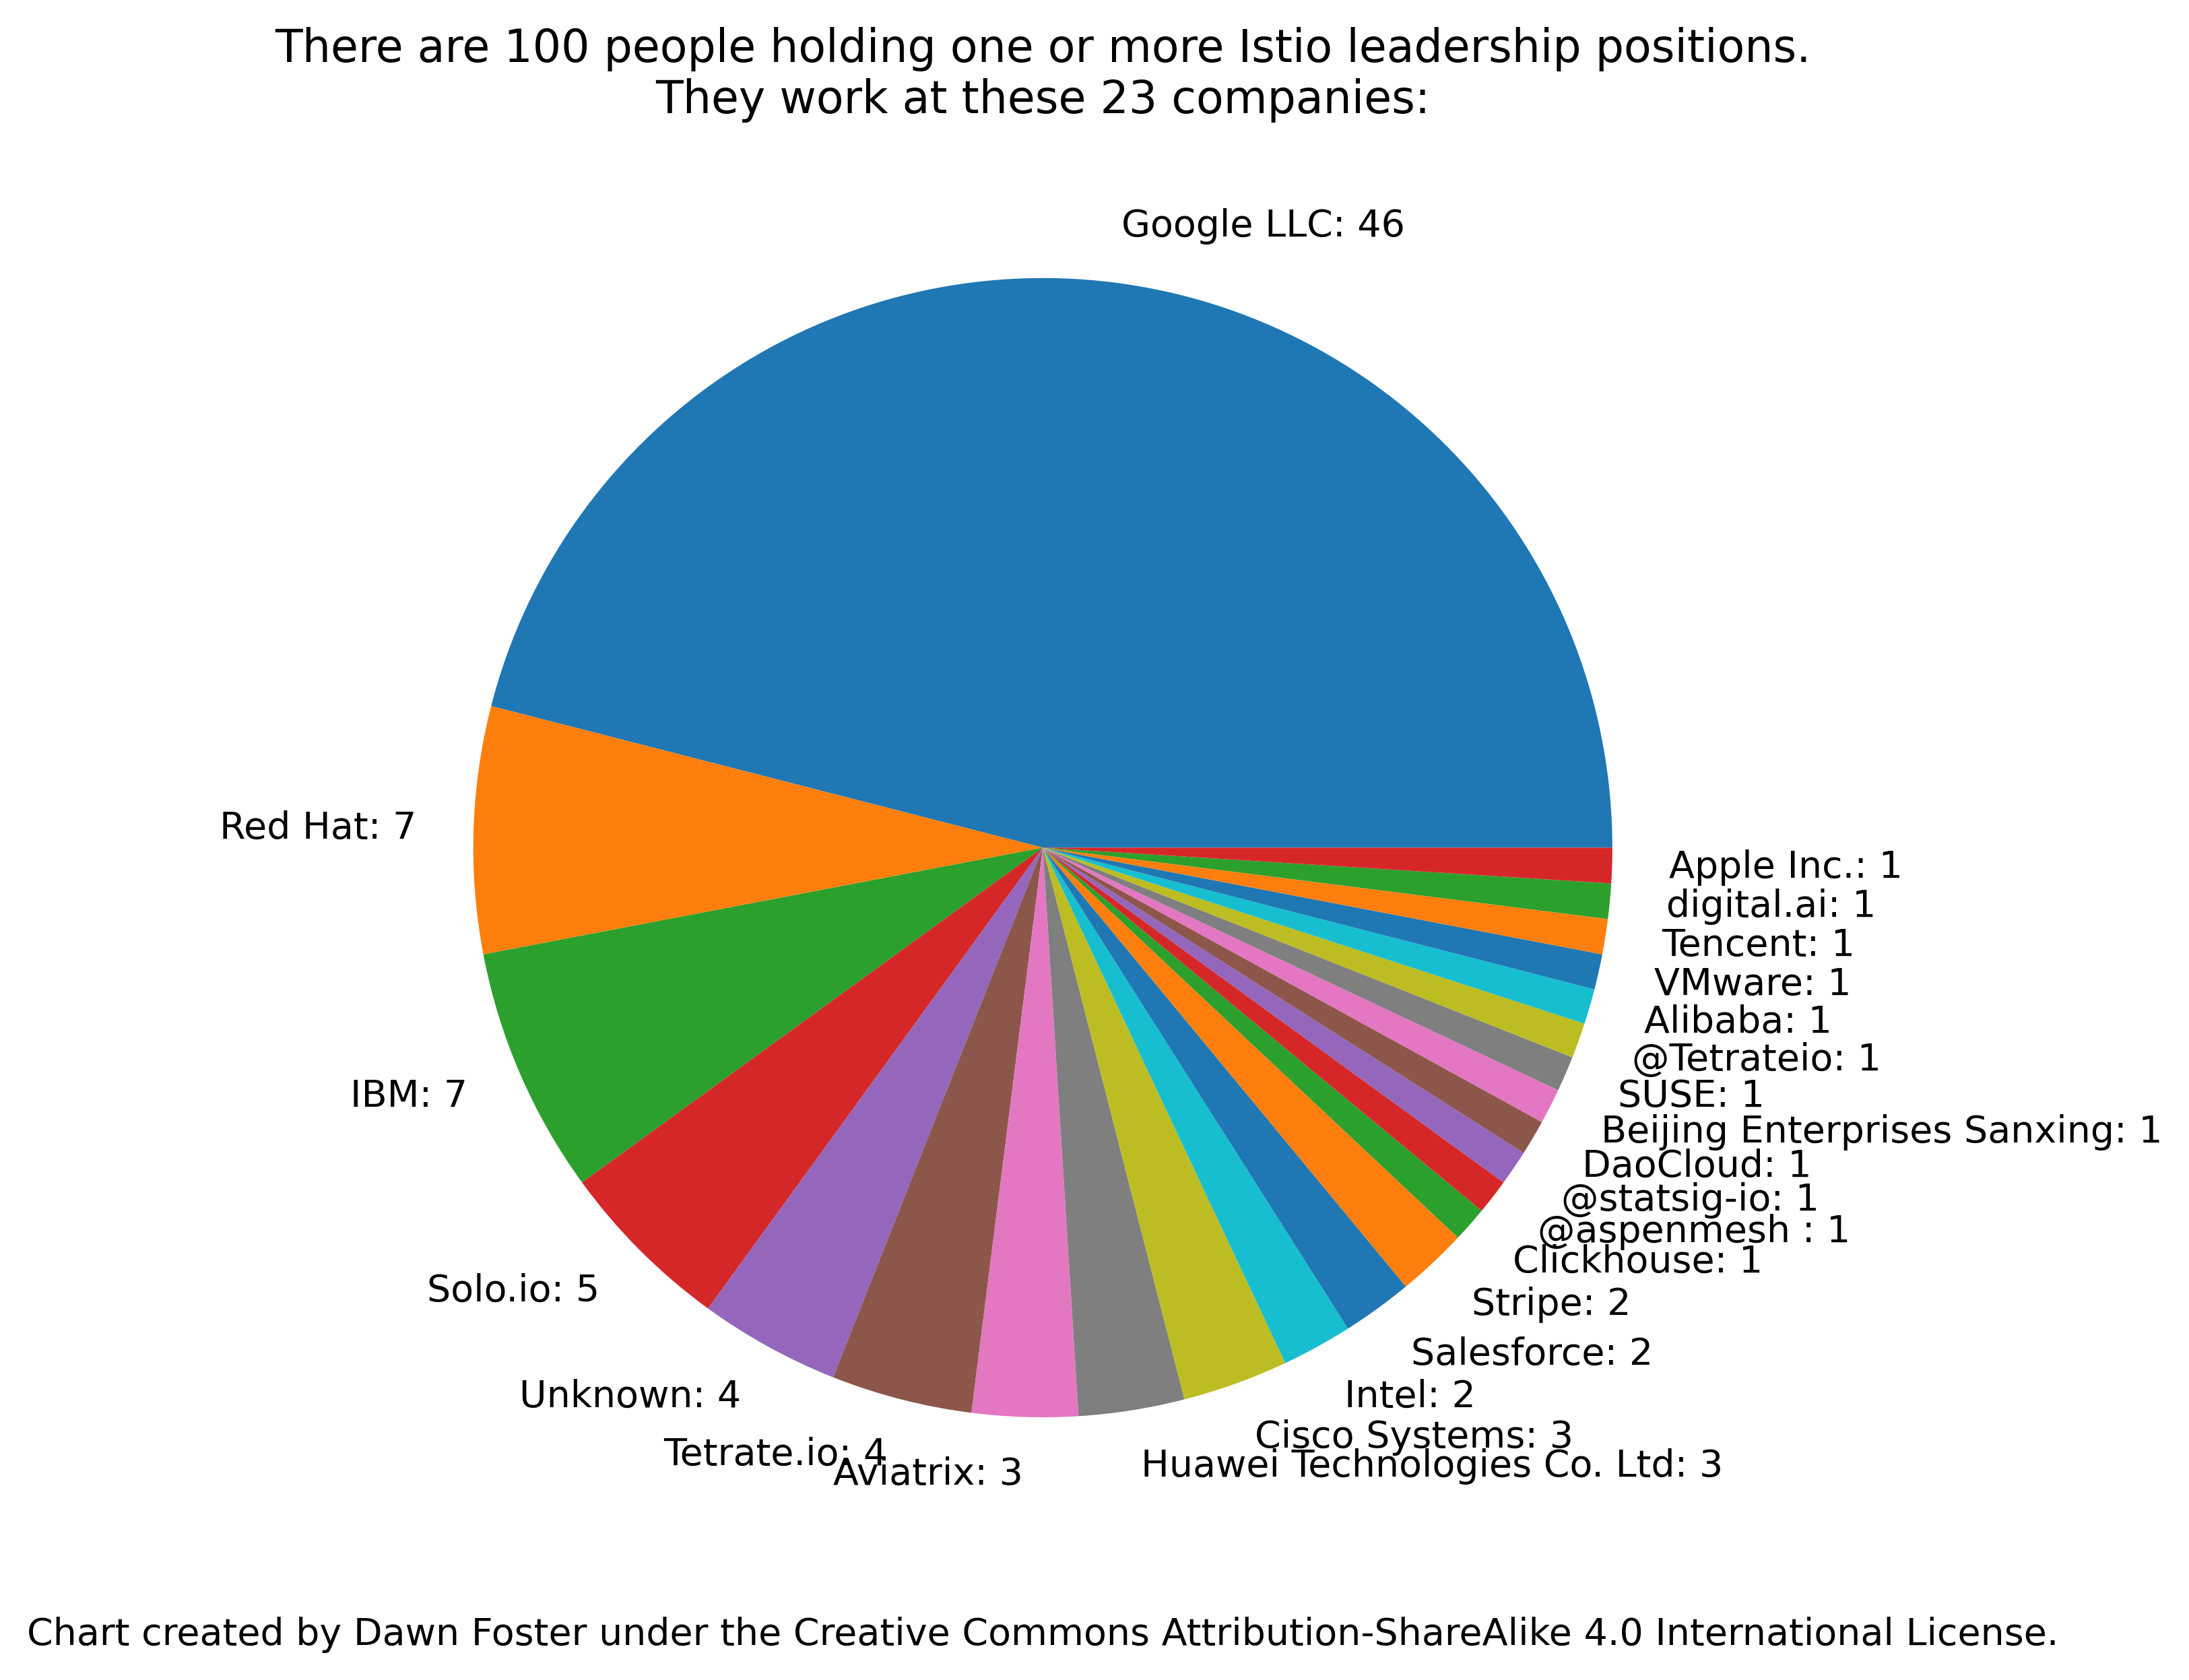

In [13]:
# Generate a pie chart from the above data
from matplotlib import pyplot as plt

data = [x[1] for x in company_agg]
labels = [str(str(x[0]) + ': ' + str(x[1])) for x in company_agg]

fig = plt.figure(figsize =(12, 7), dpi=400)
title_str = 'There are ' + str(len(users)) + ' people holding one or more Istio leadership positions.\nThey work at these ' + str(len(company_agg)-1) + " companies:"
plt.title(title_str)

plt.xlabel('\nChart created by Dawn Foster under the Creative Commons Attribution-ShareAlike 4.0 International License.')

plt.pie(data, labels = labels)
plt.show()
fig.savefig('istio_graphs_2022-04-25/all_leaders.png', dpi=fig.dpi)

## Most Significant Leadership Positions by Username

Looks at just the people holding positions on the Steering Committee, Technical Oversight Committee (TOC), and Working Group (WG) Lead positions.

In [15]:
top_leadersDF = istioDF.loc[(istioDF['team'] == 'Steering Committee') | 
                            (istioDF['team'] == 'Technical Oversight Committee') |
                            (istioDF['team'] == 'Working Group Leads')]
top_leadersDF

,company,username,team
85,Google LLC,ameer00,Steering Committee
86,Unknown,angaluri,Steering Committee
87,IBM,CloudJason,Steering Committee
88,Google LLC,craigbox,Steering Committee
89,Huawei Technologies Co. Ltd,hzxuzhonghu,Steering Committee
90,Intel,irisdingbj,Steering Committee
91,DaoCloud,kebe7jun,Steering Committee
92,Solo.io,linsun,Steering Committee
93,Google LLC,louiscryan,Steering Committee
94,Red Hat,rcernich,Steering Committee


In [16]:
# Get an array of unique GitHub usernames
top_users = top_leadersDF['username'].unique()
print('These', len(top_users), 'users hold one or more significant leadership positions:')
print(top_users)

# Use a dictionary to map company affiliation to each unique username
top_user_dict = {}
for x in top_leadersDF.iterrows():
    username = x[1].username
    company = x[1].company
    top_user_dict[username] = company

top_company_list = list(top_user_dict.values())
top_company_agg = Counter(top_company_list).most_common()
print("\nThey work at these", len(top_company_agg), "companies:")
top_company_agg

These 26 users hold one or more significant leadership positions:
['ameer00' 'angaluri' 'CloudJason' 'craigbox' 'hzxuzhonghu' 'irisdingbj'
 'kebe7jun' 'linsun' 'louiscryan' 'rcernich' 'thisisnotapril'
 'ZackButcher' 'ericvn' 'howardjohn' 'nrjpoddar' 'smawson' 'douglas-reid'
 'esnible' 'frankbu' 'jacob-delgado' 'liminw' 'lizan' 'mandarjog'
 'Monkeyanator' 'myidpt' 'stevenctl']

They work at these 10 companies:


[('Google LLC', 12),
 ('IBM', 4),
 ('Solo.io', 2),
 ('Tetrate.io', 2),
 ('Unknown', 1),
 ('Huawei Technologies Co. Ltd', 1),
 ('Intel', 1),
 ('DaoCloud', 1),
 ('Red Hat', 1),
 ('@aspenmesh ', 1)]

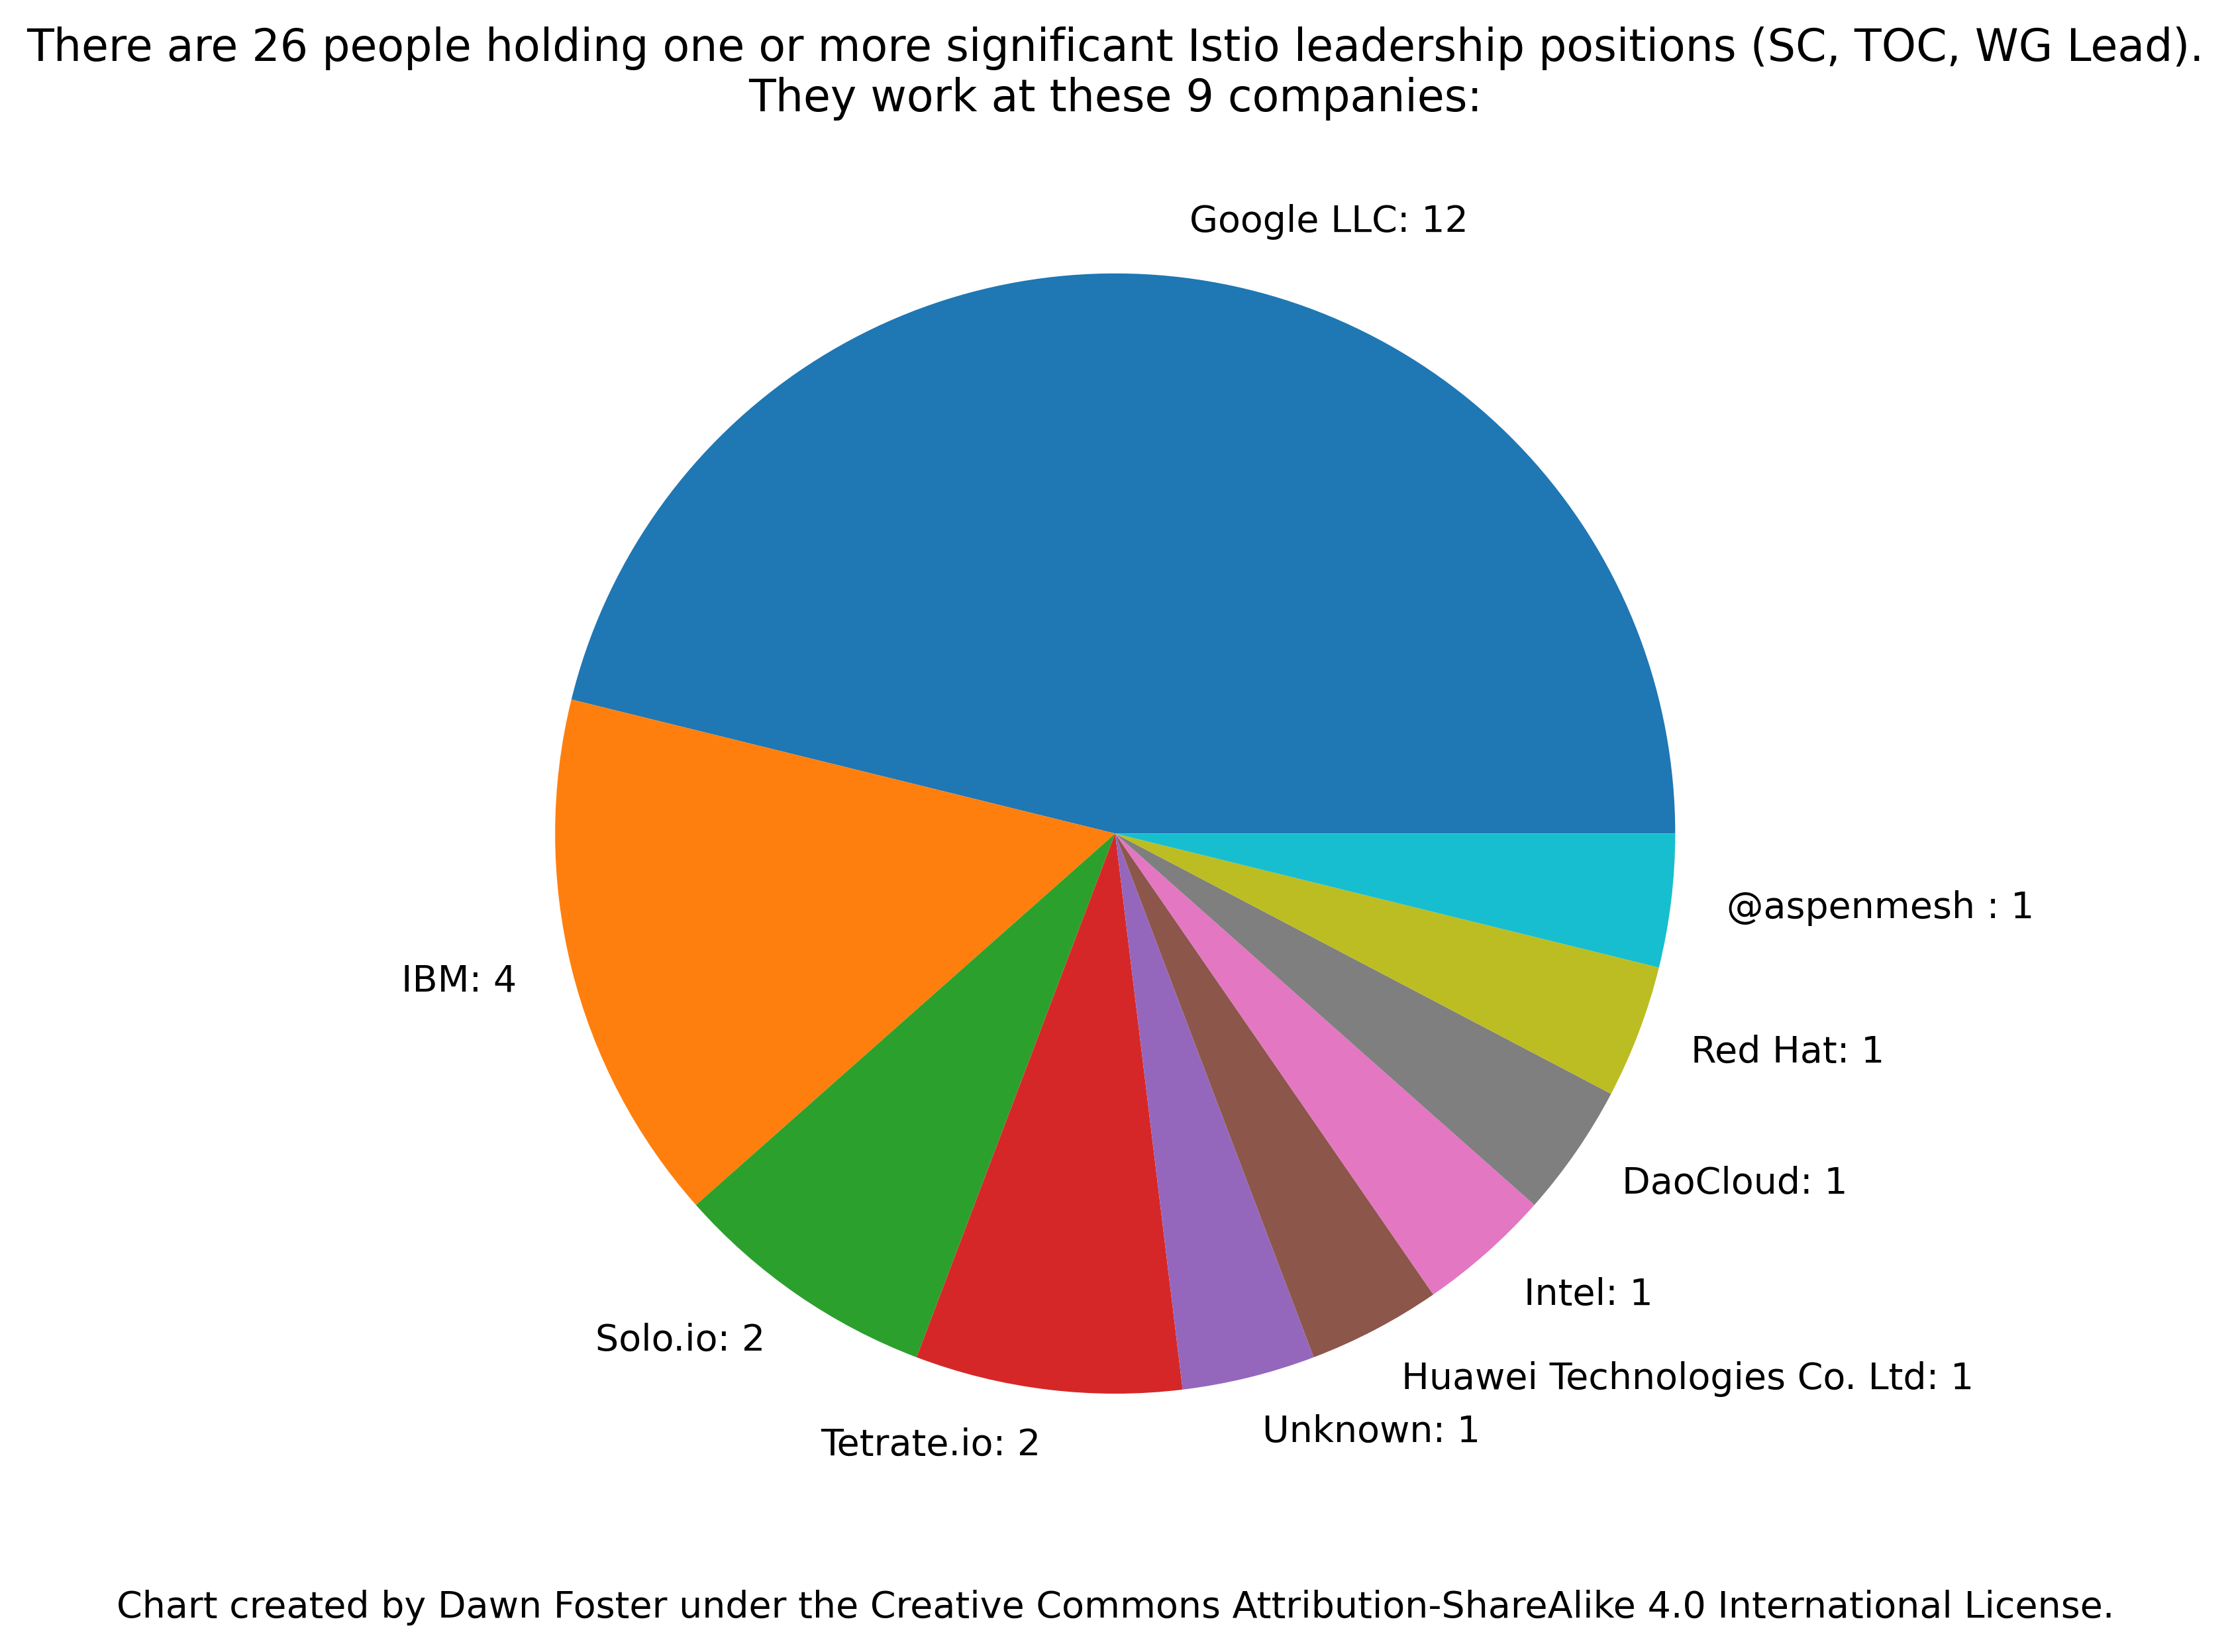

In [17]:
# Generate a pie chart from the above data about significant leadership positions
data = [x[1] for x in top_company_agg]
labels = [str(str(x[0]) + ': ' + str(x[1])) for x in top_company_agg]

fig = plt.figure(figsize =(12, 7), dpi=400)
title_str = 'There are ' + str(len(top_users)) + ' people holding one or more significant Istio leadership positions (SC, TOC, WG Lead).\nThey work at these ' + str(len(top_company_agg)-1) + " companies:"
plt.title(title_str)

plt.xlabel('\nChart created by Dawn Foster under the Creative Commons Attribution-ShareAlike 4.0 International License.')

plt.pie(data, labels = labels)
plt.show()
fig.savefig('istio_graphs_2022-04-25/top_leaders.png', dpi=fig.dpi)

## All Leadership Roles by Company
**Note: includes duplicates as many people hold multiple roles**

In [18]:
all_companies = istioDF.value_counts('company')
print("There are", len(istioDF), "leadership roles (including some duplication) held by people working at these companies:")
print(all_companies)

There are 280 leadership roles (including some duplication) held by people working at these companies:
company
Google LLC                     125
IBM                             26
Solo.io                         23
Red Hat                         20
Tetrate.io                      10
Aviatrix                         9
Huawei Technologies Co. Ltd      8
Intel                            7
Cisco Systems                    6
@aspenmesh                       5
Unknown                          5
Salesforce                       4
Stripe                           4
DaoCloud                         4
Clickhouse                       4
Alibaba                          3
@statsig-io                      3
@Tetrateio                       3
Beijing Enterprises Sanxing      3
VMware                           2
SUSE                             2
Tencent                          2
Apple Inc.                       1
digital.ai                       1
dtype: int64
